# Dataset: Fashion MNIST
The Fashion MNIST dataset consists of 70,000 grayscale images of 10 different categories of clothing items, with 60,000 images for training and 10,000 for testing. Each image is 28x28 pixels.

Model: Convolutional Neural Network (CNN)
We'll build a simple CNN model for this task.

Steps:
Load and Preprocess the Data: Normalize the images and prepare the data for training.
Define the Model: Use a series of convolutional layers followed by dense layers, ending with a Softmax activation for multiclass classification.
Compile the Model: Specify the loss function, optimizer, and evaluation metrics.
Train the Model: Train the model on the training data.
Evaluate the Model: Evaluate the model's performance on the test data.
Here’s the complete code:


### Dataset: Fashion MNIST
The Fashion MNIST dataset consists of 70,000 grayscale images of 10 different categories of clothing items, with 60,000 images for training and 10,000 for testing. Each image is 28x28 pixels.

### Model: Convolutional Neural Network (CNN)
We'll build a simple CNN model for this task.

#### Steps:
1. **Load and Preprocess the Data**: Normalize the images and prepare the data for training.
2. **Define the Model**: Use a series of convolutional layers followed by dense layers, ending with a Softmax activation for multiclass classification.
3. **Compile the Model**: Specify the loss function, optimizer, and evaluation metrics.
4. **Train the Model**: Train the model on the training data.
5. **Evaluate the Model**: Evaluate the model's performance on the test data.

Here’s thedifferent architectures, data augmentation, and other techniques.

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.4940 - accuracy: 0.8208 - val_loss: 0.3708 - val_accuracy: 0.8665
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3211 - accuracy: 0.8816 - val_loss: 0.3378 - val_accuracy: 0.8724
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2736 - accuracy: 0.8995 - val_loss: 0.2995 - val_accuracy: 0.8937
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2455 - accuracy: 0.9099 - val_loss: 0.2762 - val_accuracy: 0.9008
Epoch 5/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2202 - accuracy: 0.9176 - val_loss: 0.2680 - val_accuracy: 0.9062
Epoch 6/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1990 - accuracy: 0.9266 - val_loss: 0.2666 - val_accuracy: 0.9060
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1833 - accuracy: 0.9306 - val_loss: 0.2617 -

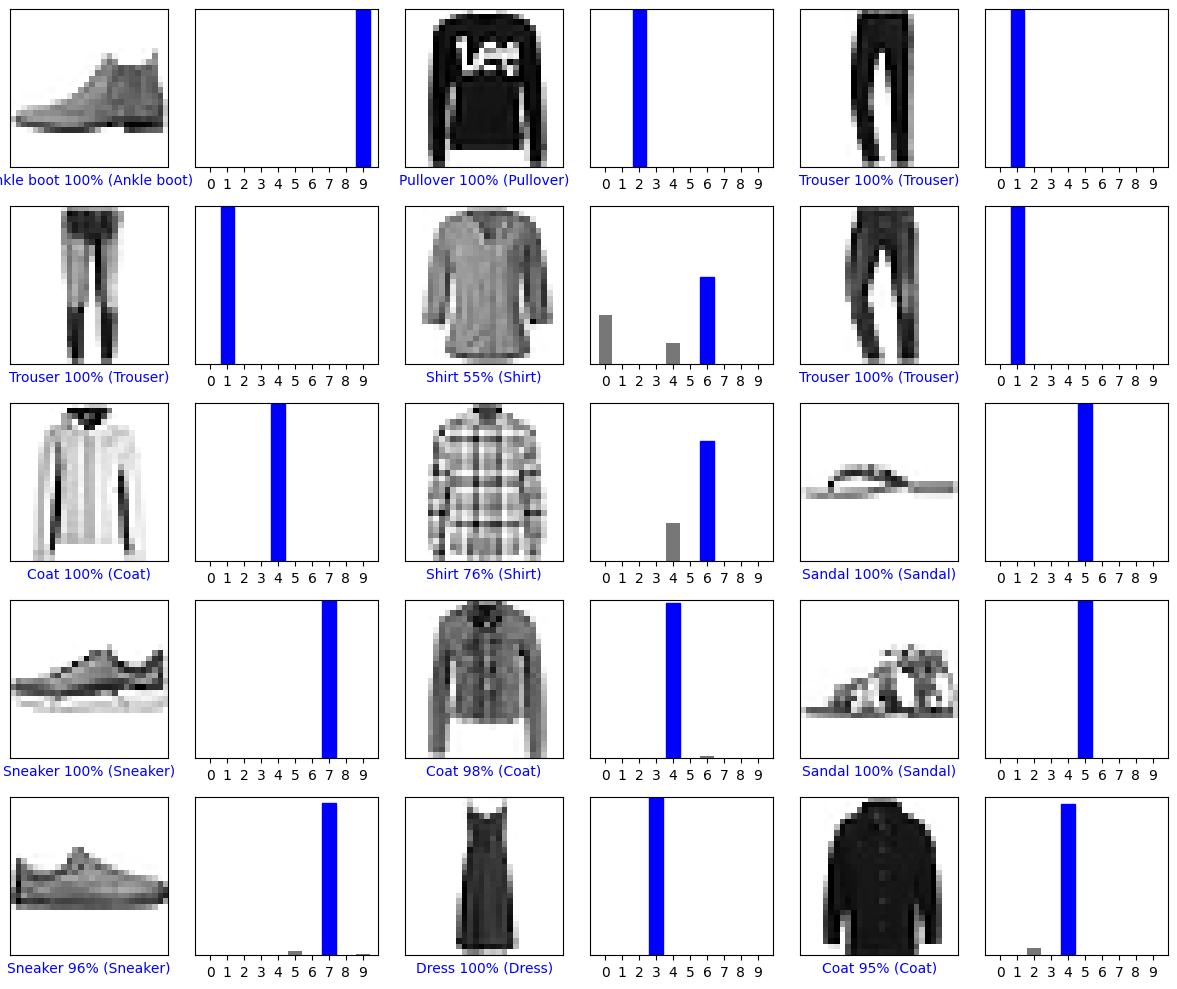

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Expand the dimensions of images to include the channel dimension
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Make predictions on the test dataset
predictions = model.predict(test_images)

# Define a function to plot the images along with predictions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Define class names for the Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot some images with their predictions
num_rows, num_cols = 5, 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images.squeeze())
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)
plt.tight_layout()
plt.show()


### Explanation:
1. **Data Preprocessing**: The images are normalized to a range of 0 to 1 by dividing by 255, which helps in speeding up the training process.
2. **Model Architecture**:
   - **Conv2D and MaxPooling2D Layers**: These layers extract features from the images. The convolutional layers apply filters to the input data, while max pooling reduces the spatial dimensions.
   - **Flatten Layer**: This layer flattens the 2D output of the convolutional layers to 1D, so it can be input into the dense layers.
   - **Dense Layers**: These fully connected layers are used for making predictions. The last dense layer has 10 units (one for each class in the dataset) and uses the Softmax activation function to output probabilities for each class.
3. **Training and Evaluation**: The model is trained using the Adam optimizer and sparse categorical cross-entropy loss, which is appropriate for multiclass classification problems where labels are integer-encoded.
4. **Prediction**:
The model.predict(test_images) function generates an array of probabilities for each class for each image in the test set.
The np.argmax(predictions, axis=1) function extracts the index of the highest probability for each prediction, which corresponds to the predicted class.
5. **Visualization**:
The plot_image function displays each image and shows the predicted label, prediction confidence, and the true label. The color indicates whether the prediction is correct (blue) or incorrect (red).
The plot_value_array function displays a bar chart for the prediction probabilities of all classes, highlighting the predicted and true classes.
The class names are defined in the class_names list, which corresponds to the labels in the Fashion MNIST dataset.

This code provides a basic but complete workflow for multiclass classification using TensorFlow and the Fashion MNIST dataset. You can further enhance the model by experimenting with different architectures, data augmentation, and other techniques.